In [2]:
#1.下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。


import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
data =  pd.read_excel('sz50.xlsx',sheet_name=None, index_col='datetime')
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


In [3]:
#2.读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

import talib as ta
MA = ta.MA(data['600036.XSHG'].close.values,10)
print(type(MA))
print(MA[-5:])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


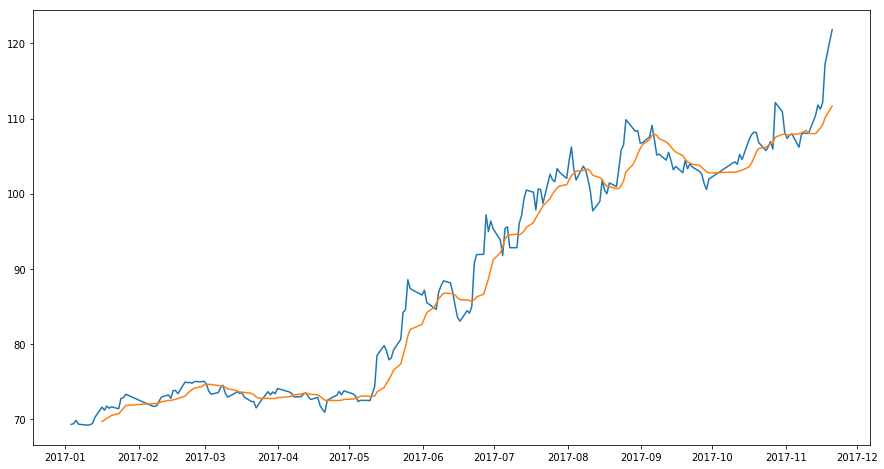

In [6]:
#3.将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

import matplotlib.pyplot as plt

MA_Series = pd.Series(MA,index=data['600036.XSHG'].index)
plt.figure(figsize=(15,8))
plt.plot(data['600036.XSHG'].close)
plt.plot(MA_Series)
plt.show()

In [7]:
#4.用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

import openpyxl

wb = openpyxl.load_workbook('sz50.xlsx')
sheets = wb.sheetnames # 获取workbook中所有的表格
data_dict = {}
for s in sheets:
    data =  pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
MI = PN.to_frame(False)
print(MI.head())

                            600000.XSHG  600016.XSHG   600028.XSHG  \
datetime            minor                                            
2017-01-03 15:00:00 close        115.99       135.93  1.094000e+01   
                    high         117.06       136.67  1.096000e+01   
                    low          115.14       135.03  1.073000e+01   
                    open         115.43       135.48  1.077000e+01   
                    volume  16232125.00  58351289.00  1.028157e+08   

                            600029.XSHG  600030.XSHG  600036.XSHG  \
datetime            minor                                           
2017-01-03 15:00:00 close         11.64        61.83        69.31   
                    high          11.69        61.98        69.39   
                    low           11.54        61.25        67.80   
                    open          11.55        61.41        67.92   
                    volume  26749400.00  62299748.00  30449820.00   

                         

In [8]:
#接第四题

for s in sheets:
    ROCR100 = pd.DataFrame(PN.minor_xs('close'), index = PN.minor_xs('close').index)
    data =  pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
ROCR100 = pd.DataFrame(PN.minor_xs('close'), index = PN.minor_xs('close').index)
ROCR100

,600000.XSHG,600016.XSHG,600028.XSHG,600029.XSHG,600030.XSHG,600036.XSHG,600048.XSHG,600050.XSHG,600100.XSHG,600104.XSHG,...,601766.XSHG,601788.XSHG,601800.XSHG,601818.XSHG,601857.XSHG,601881.XSHG,601901.XSHG,601985.XSHG,601988.XSHG,601989.XSHG
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-03 15:00:00,115.99,135.93,10.94,11.64,61.83,69.31,170.27,8.99,210.96,141.29,...,11.21,18.74,17.97,5.03,10.10,NaN,7.96,7.20,5.42,12.32
2017-01-04 15:00:00,116.28,135.93,11.06,11.72,61.94,69.42,170.64,8.98,212.01,143.71,...,11.32,18.74,18.17,5.03,10.12,NaN,8.00,7.20,5.44,12.38
2017-01-05 15:00:00,116.07,135.63,11.42,11.80,61.64,69.85,170.08,9.48,210.80,142.17,...,11.28,18.68,18.12,5.03,10.34,NaN,7.94,7.15,5.44,12.54
2017-01-06 15:00:00,115.21,134.58,11.64,11.80,61.14,69.35,169.53,9.27,209.29,141.41,...,11.32,18.40,18.35,4.99,10.58,NaN,7.87,7.15,5.38,12.47
2017-01-09 15:00:00,115.35,134.73,11.64,11.85,61.41,69.23,169.90,9.31,210.65,142.88,...,11.54,18.45,18.52,4.98,10.59,NaN,7.89,7.29,5.39,13.02
2017-01-10 15:00:00,115.28,134.73,11.72,12.73,61.48,69.23,170.08,9.13,210.05,142.00,...,11.46,18.41,17.98,4.98,10.63,NaN,7.90,7.23,5.38,12.74
2017-01-11 15:00:00,115.07,134.14,11.44,12.13,61.52,69.27,169.16,8.34,207.33,141.17,...,11.35,18.33,18.14,4.97,10.54,NaN,7.74,7.21,5.39,12.84
2017-01-12 15:00:00,114.78,134.29,11.58,11.98,61.67,69.46,167.49,8.06,203.55,141.64,...,11.24,18.22,18.12,4.96,10.53,NaN,7.70,7.16,5.39,12.85
2017-01-13 15:00:00,115.85,135.48,11.68,11.97,61.94,70.27,168.23,8.03,201.89,142.82,...,11.29,18.26,18.15,4.99,10.62,NaN,7.73,7.18,5.42,12.62


In [9]:
#接第4题
stocks = pd.Panel({s: pd.read_excel('sz50.xlsx', sheetname=s, index_col='datetime') 
                   for s in range(5)})
ROCR100 = pd.DataFrame({item: ta.ROCR100(value.values) for item, value in stocks.minor_xs('close').iteritems()}, index = stocks.minor_xs('close').index)
ROCR100.columns=['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG']
ROCR100.columns=['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG']
ROCR100.iloc[:,0:5]

,600000.XSHG,600016.XSHG,600028.XSHG,600029.XSHG,600030.XSHG
datetime,,,,,
2017-01-03 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-04 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-05 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-06 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-09 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-10 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-11 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-12 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-01-13 15:00:00,NaN,NaN,NaN,NaN,NaN


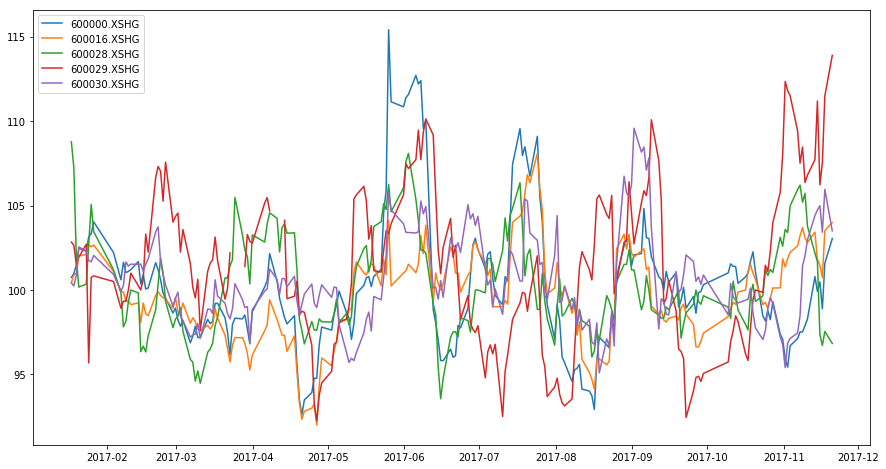

In [10]:
#接第4题
plt.figure(figsize=(15,8))
plt.plot(ROCR100.iloc[:,0:5])
plt.legend(ROCR100.iloc[:,0:5].columns)
plt.show()

In [11]:
#5.用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式

PN=PN.fillna(0)
import talib.abstract as ta
pn_macd = pd.Panel({name: ta.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame()
df_macd.head(15)

macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600485.XSHG   0.000000    0.000000   0.000000
                    600518.XSHG   1.014290    2.387216  -1.372926
                    600519.XSHG  20.810882    7.146779  13.664103